# AI Resume Project - Action Detection for Sign

Hello all, this is your GDSC data science lead and today's speaker, Mahima Shetty. 
I will further proceed with the project introduction.  So today we are going to learn step by step how to create an action detection for a sign language project. This Hands-On Workshop would be going to be exciting as there will be lots of hands-on experience and also a deep understanding of AI, its algorithms, and its application.



Action detection is a great project which you can put in your resume.  Making this project really gives you a lot of insights especially regarding the field of deep learning and AI. Also if you're proceeding with this project you will also be able to complete other similar projects and also it can be a necessary dose for participating in hackathons.

So, 
## What is Action Detection?
In computer vision, action recognition is the task of identifying when a person in an image or video is performing a given action. AI models can be trained to recognize a variety of actions, from running and sleeping to drinking, falling, or riding a bike.

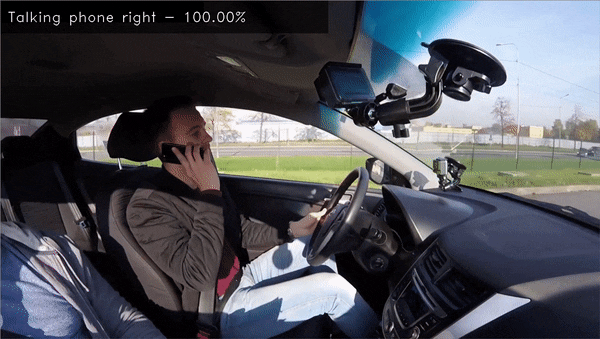

GIF credit by openVino https://docs.openvino.ai/2021.3/omz_demos_action_recognition_demo_python.html


## Some of the applications:

<b>Safety and security AI:</b> Using surveillance cameras, action recognition can help identify and isolate footage of people who are performing suspicious actions, especially in unusual contexts, such as late at night or in restricted areas. The system can then send alerts to the appropriate individuals for further investigation.

<b>Healthcare AI:</b> When in-home caregivers for the elderly are away or unavailable, fall detection systems (with home cameras in key locations) can help detect falls that may result in serious injury. Check out this short video for a demonstration of a fall detection system in action.

<b>Media AI:</b> Action recognition systems can help sort through large quantities of multimedia (images, videos, etc.) to identify relevant content. For example, users could run a search for images of “Vladimir Putin shaking hands” to find the right illustration for a news article. 
                    


    1. Import and Install Dependencies
    2. Keypoints using MP Holistic
    3. Extract Keypoint Values
    4. Setup Folders for Collection
    5. Collect Keypoint Values for Training and Testing
    6. Preprocess Data and Create Labels and Features
    7. Build and Train LSTM Neural Network
    8. Make Predictions
    9. Save Weights
    10. Evaluation using Confusion Matrix and Accuracy
    11. Test in Real Time




# 1. Import and Install Dependencies



1. tensorflow
2. tensorflow-gpu
3. opencv
4. mediapipe
5. sklearn
6. matplotlib


The below code will run and install all necessary packages.
 > !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

## Why are we installing these packages and what are its significance?

1. **Tensorflow** -> TensorFlow provides a collection of workflows to develop and train models using Python or JavaScript, and to easily deploy in the cloud, on-prem, in the browser, or on-device no matter what language you use. The tf. data API enables you to build complex input pipelines from simple, reusable pieces.
2. **OpenCV** -> OpenCV is a great tool for image processing and performing computer vision tasks. It is an open-source library that can be used to perform tasks like face detection, objection tracking, landmark detection, and much
3. **Mediapipe** -> MediaPipe is a cross-platform framework for building multimodal applied machine learning pipelines. MediaPipe is a framework for building multimodal (eg. video, audio, any time series data).
4. **sklearn** -> Scikit-learn is probably the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.
5. **numpy** -> NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
6. **matplotlib** -> Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy.


### Checking the version of python

The version is kept 3.6.13 to avoid any dependencies conflict. So, **3.6.13 is most recommended.**

In [1]:
from platform import python_version

print(python_version())
!pip install mediapipe

3.6.13


### Importing the necessary packages

In [2]:

import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

## What is MP Holistic?


**MediaPipe Holistic** utilizes the pose, face and hand landmark models in MediaPipe Pose, MediaPipe Face Mesh and MediaPipe Hands respectively to generate a total of **543 landmarks (33 pose landmarks, 468 face landmarks, and 21 hand landmarks per hand).**

**Drawing Utils** is needed while tracking the holistic model and the landmarks points.


In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

## Defining our mediapipe detection model 

Inside model we will add,

**cv2.cvtColor()** method is used to convert an image from one color space to another. There are more than 150 color-space conversion methods available in OpenCV. Now we will use to _convert color from BGR to RGB_.
    
Making the image non-writable before we try to do the process over our model.
    
Then after making prediction we will make the image writable.
 
Then we will use **cv2.cvtColor()** again to bring color space _RGB TO BGR_. 

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

### Defining Model for drawing landmarks which is needed for making Holistic Model.

Taking these landmarks in consideration. 


1.**FACE CONNECTIONS**
Facial landmarks are used to localize and represent important regions of the face, such as:
· Mouth

· Eyes

· Eyebrows

· Nose

· Jawline etc.
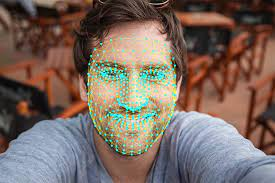

2.**POSE CONNECTIONS**

<div>
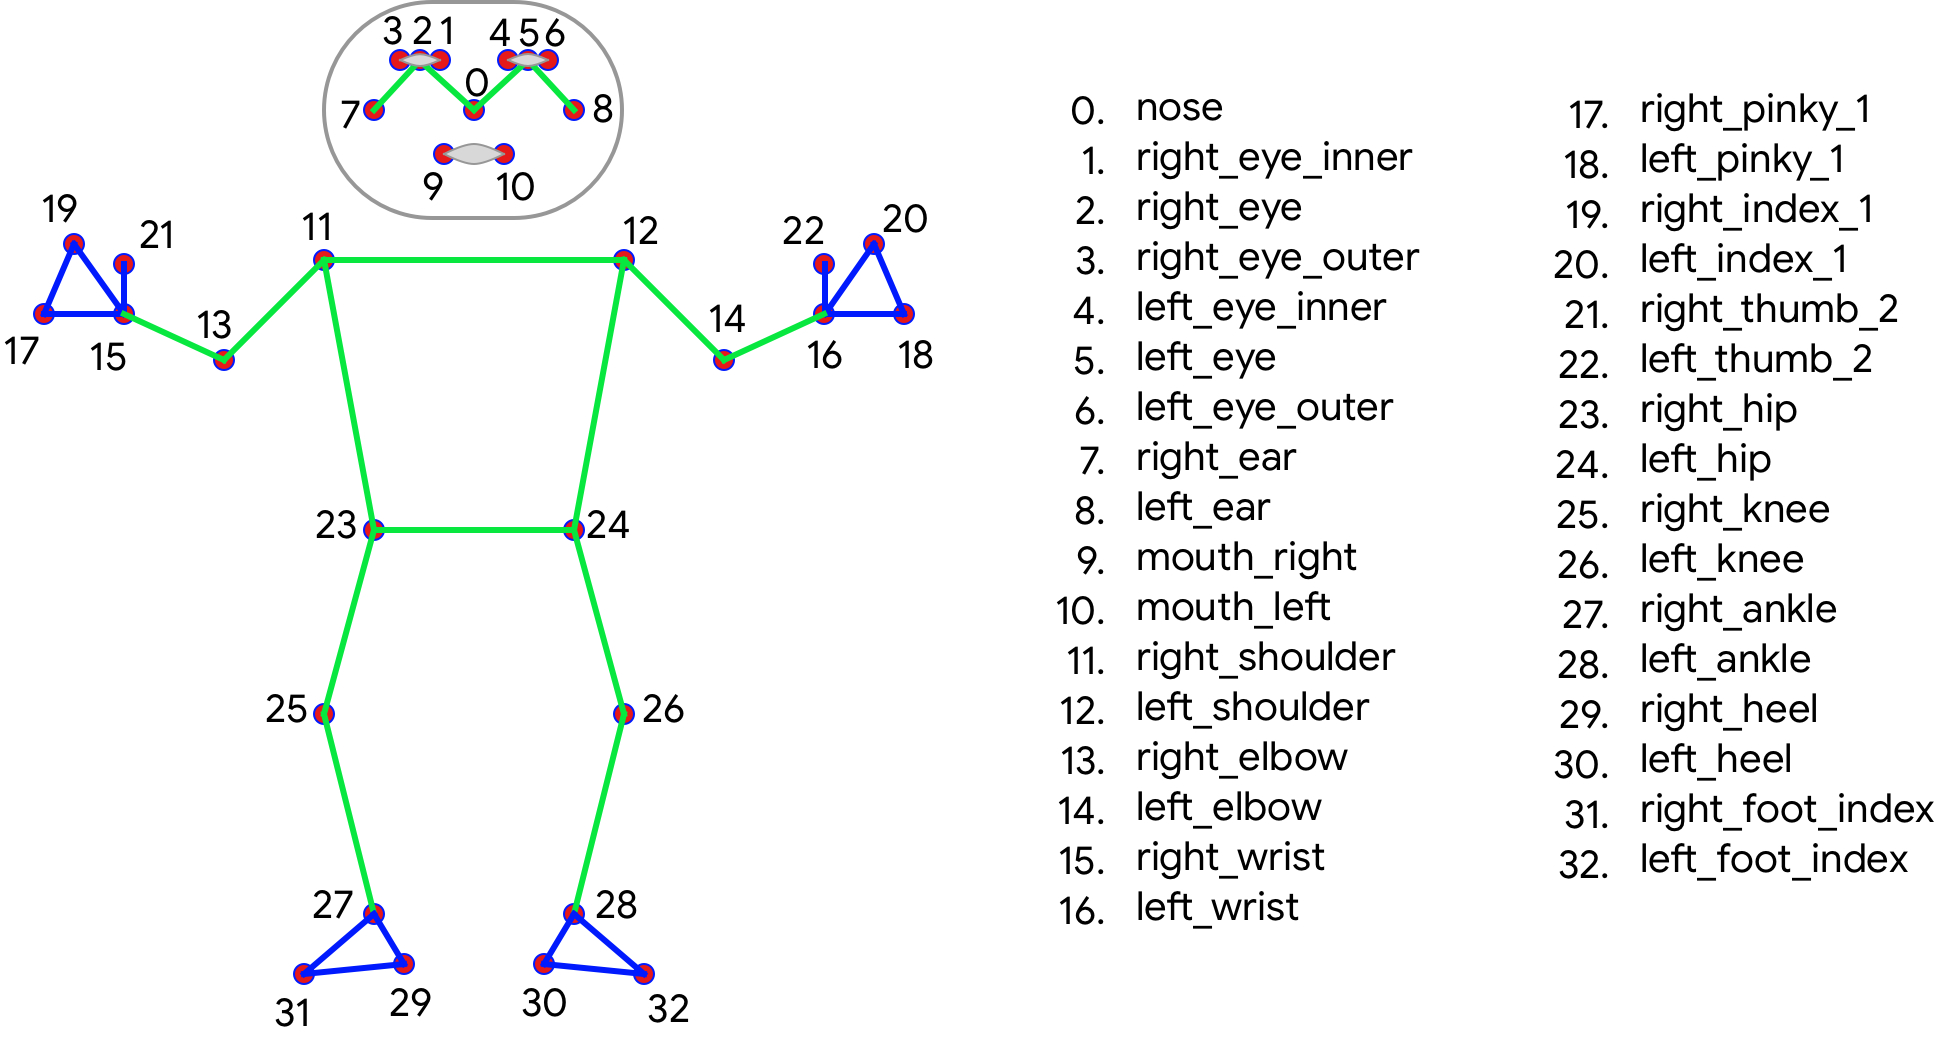
</div>


3.**HAND CONNECTIONS**
<div>
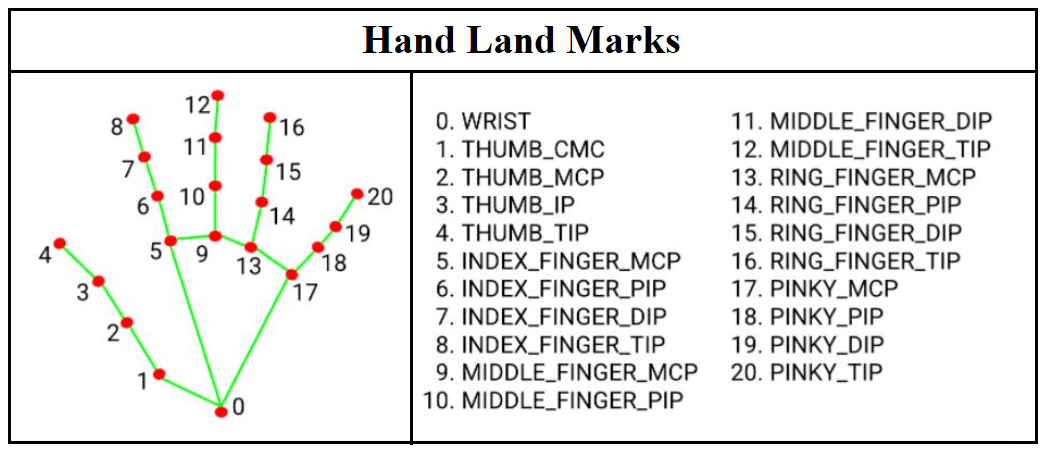
</div>




In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

### Styling the landmarks drawing utils

Adding the colors to specify different areas of tracking body 

**Colors**

FACE_CONNECTIONS:
(80, 110, 10)  -> Olive Dark Green
(80, 256, 121) -> Fluorescent Green

POSE_CONNECTIONS:
(80, 22, 10)  -> Brown
(80, 44, 121) -> Dark Violet

LEFT_HAND_CONNECTIONS:
(121, 22, 76) -> Dark Pink
(121, 44, 250)-> Fluorescent Violet

RIGHT_HAND_CONNECTIONS:
(245, 117, 66)-> Light Orange
(245, 66, 230)-> Fluorescent Pink




In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

Confidence score can be used to refrain from making decisions when it is not above a sufficient threshold.
Minimum detection confidence is set to 0.5 and the minimum tracking confidence is set to 0.5.




**Pose with your Left arm up**

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
draw_landmarks(frame, results)

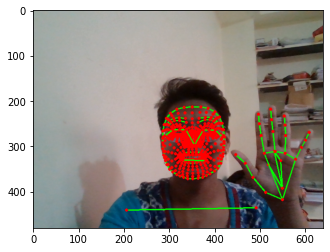

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

### You can try doing these below code to find out landmarks:

        print(len(results.face_landmarks.landmark)) 

        print(len(results.pose_landmarks.landmark))
        
        print(len(results.left_hand_landmarks.landmark))
        
        print(len(results.right_hand_landmarks.landmark))


In [12]:
print(len(results.face_landmarks.landmark))
print(len(results.pose_landmarks.landmark))

468
33


In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    
if results.face_landmarks:
    np.zeros(1404)


In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.55702513,  0.62080967, -0.8360855 , ...,  0.        ,
        0.        ,  0.        ])

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.55702513,  0.62080967, -0.8360855 , ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'okay', 'namaste'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [22]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [23]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [24]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [25]:
!pip install sklearn
!pip install tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'hello': 0, 'okay': 1, 'namaste': 2}

In [28]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [29]:
np.array(sequences).shape

(90, 30, 1662)

In [30]:
np.array(labels).shape

(90,)

In [31]:
X = np.array(sequences)

In [32]:
X.shape

(90, 30, 1662)

In [33]:
y = to_categorical(labels).astype(int)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [35]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
!pip install matplotlib


In [50]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [51]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [52]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [54]:
#from keras.callbacks import EarlyStopping
# es = EarlyStopping(monitor='categorical_accuracy', mode='min', verbose=1, patience=0)

In [57]:
model.fit(X_train, y_train, epochs=10000, callbacks=[tb_callback]) #stop near 4000 --- 3897

Epoch 1/10000
3/3 [==============================] - 1s 587ms/step - loss: 0.9302 - categorical_accuracy: 0.5176
Epoch 2/10000
3/3 [==============================] - 0s 72ms/step - loss: 0.9012 - categorical_accuracy: 0.5882
Epoch 3/10000
3/3 [==============================] - 0s 73ms/step - loss: 0.8488 - categorical_accuracy: 0.5882
Epoch 4/10000
3/3 [==============================] - 0s 93ms/step - loss: 0.8766 - categorical_accuracy: 0.5412
Epoch 5/10000
3/3 [==============================] - 0s 97ms/step - loss: 0.8537 - categorical_accuracy: 0.5765
Epoch 6/10000
3/3 [==============================] - 0s 75ms/step - loss: 0.8351 - categorical_accuracy: 0.6235
Epoch 7/10000
3/3 [==============================] - 0s 70ms/step - loss: 0.8377 - categorical_accuracy: 0.5412
Epoch 8/10000
3/3 [==============================] - 0s 72ms/step - loss: 0.8075 - categorical_accuracy: 0.6941
Epoch 9/10000
3/3 [==============================] - 0s 69ms/step - loss: 0.7888 - categorical_accuracy

3/3 [==============================] - 0s 70ms/step - loss: 0.7508 - categorical_accuracy: 0.6588
Epoch 74/10000
3/3 [==============================] - 0s 78ms/step - loss: 0.9548 - categorical_accuracy: 0.4941
Epoch 75/10000
3/3 [==============================] - 0s 69ms/step - loss: 1.9363 - categorical_accuracy: 0.4235
Epoch 76/10000
3/3 [==============================] - 0s 80ms/step - loss: 1.0887 - categorical_accuracy: 0.4353
Epoch 77/10000
3/3 [==============================] - 0s 69ms/step - loss: 59.0914 - categorical_accuracy: 0.3176
Epoch 78/10000
3/3 [==============================] - 0s 80ms/step - loss: 1.2204 - categorical_accuracy: 0.4235
Epoch 79/10000
3/3 [==============================] - 0s 71ms/step - loss: 1.3534 - categorical_accuracy: 0.4000
Epoch 80/10000
3/3 [==============================] - 0s 72ms/step - loss: 1.3207 - categorical_accuracy: 0.3647
Epoch 81/10000
3/3 [==============================] - 0s 74ms/step - loss: 8.1404 - categorical_accuracy: 0.35

3/3 [==============================] - 0s 79ms/step - loss: 0.6611 - categorical_accuracy: 0.6235
Epoch 146/10000
3/3 [==============================] - 0s 69ms/step - loss: 0.6589 - categorical_accuracy: 0.6353
Epoch 147/10000
3/3 [==============================] - 0s 80ms/step - loss: 0.6578 - categorical_accuracy: 0.6588
Epoch 148/10000
3/3 [==============================] - 0s 71ms/step - loss: 0.6544 - categorical_accuracy: 0.6588
Epoch 149/10000
3/3 [==============================] - 0s 79ms/step - loss: 0.6499 - categorical_accuracy: 0.6588
Epoch 150/10000
3/3 [==============================] - 0s 71ms/step - loss: 0.6484 - categorical_accuracy: 0.6471
Epoch 151/10000
3/3 [==============================] - 0s 81ms/step - loss: 0.6425 - categorical_accuracy: 0.6706
Epoch 152/10000
3/3 [==============================] - 0s 71ms/step - loss: 0.6376 - categorical_accuracy: 0.6824
Epoch 153/10000
3/3 [==============================] - 0s 73ms/step - loss: 0.6353 - categorical_accurac

3/3 [==============================] - 0s 76ms/step - loss: 1.0932 - categorical_accuracy: 0.4000
Epoch 217/10000
3/3 [==============================] - 0s 75ms/step - loss: 1.0962 - categorical_accuracy: 0.3882
Epoch 218/10000
3/3 [==============================] - 0s 76ms/step - loss: 1.0934 - categorical_accuracy: 0.4118
Epoch 219/10000
3/3 [==============================] - 0s 78ms/step - loss: 1.0893 - categorical_accuracy: 0.4235
Epoch 220/10000
3/3 [==============================] - 0s 71ms/step - loss: 1.0880 - categorical_accuracy: 0.4000
Epoch 221/10000
3/3 [==============================] - 0s 74ms/step - loss: 1.0898 - categorical_accuracy: 0.3765
Epoch 222/10000
3/3 [==============================] - 0s 73ms/step - loss: 1.0788 - categorical_accuracy: 0.4588
Epoch 223/10000
3/3 [==============================] - 0s 77ms/step - loss: 1.0848 - categorical_accuracy: 0.4353
Epoch 224/10000
3/3 [==============================] - 0s 82ms/step - loss: 1.0770 - categorical_accurac

3/3 [==============================] - 0s 71ms/step - loss: 1.0859 - categorical_accuracy: 0.3882
Epoch 289/10000
3/3 [==============================] - 0s 71ms/step - loss: 1.0857 - categorical_accuracy: 0.3882
Epoch 290/10000
3/3 [==============================] - 0s 67ms/step - loss: 1.0847 - categorical_accuracy: 0.3882
Epoch 291/10000
3/3 [==============================] - 0s 70ms/step - loss: 1.0841 - categorical_accuracy: 0.3882
Epoch 292/10000
3/3 [==============================] - 0s 71ms/step - loss: 1.0837 - categorical_accuracy: 0.3882
Epoch 293/10000
3/3 [==============================] - 0s 71ms/step - loss: 1.0830 - categorical_accuracy: 0.3882
Epoch 294/10000
3/3 [==============================] - 0s 71ms/step - loss: 1.0826 - categorical_accuracy: 0.3882
Epoch 295/10000
3/3 [==============================] - 0s 72ms/step - loss: 1.0825 - categorical_accuracy: 0.3882
Epoch 296/10000
3/3 [==============================] - 0s 70ms/step - loss: 1.0818 - categorical_accurac

3/3 [==============================] - 0s 85ms/step - loss: 1.4586 - categorical_accuracy: 0.3882
Epoch 360/10000
3/3 [==============================] - 0s 82ms/step - loss: 1.4073 - categorical_accuracy: 0.3882
Epoch 361/10000
3/3 [==============================] - 0s 72ms/step - loss: 1.3328 - categorical_accuracy: 0.3882
Epoch 362/10000
3/3 [==============================] - 0s 70ms/step - loss: 1.2560 - categorical_accuracy: 0.3882
Epoch 363/10000
3/3 [==============================] - 0s 71ms/step - loss: 1.1762 - categorical_accuracy: 0.3882
Epoch 364/10000
3/3 [==============================] - 0s 69ms/step - loss: 1.1251 - categorical_accuracy: 0.3529
Epoch 365/10000
3/3 [==============================] - 0s 72ms/step - loss: 1.1001 - categorical_accuracy: 0.3529
Epoch 366/10000
3/3 [==============================] - 0s 74ms/step - loss: 1.0897 - categorical_accuracy: 0.3647
Epoch 367/10000
3/3 [==============================] - 0s 74ms/step - loss: 1.0912 - categorical_accurac

3/3 [==============================] - 0s 72ms/step - loss: 1.0305 - categorical_accuracy: 0.4118
Epoch 432/10000
3/3 [==============================] - 0s 71ms/step - loss: 1.0212 - categorical_accuracy: 0.4000
Epoch 433/10000
3/3 [==============================] - 0s 74ms/step - loss: 1.0154 - categorical_accuracy: 0.3294
Epoch 434/10000
3/3 [==============================] - 0s 77ms/step - loss: 0.9879 - categorical_accuracy: 0.3059
Epoch 435/10000
3/3 [==============================] - 0s 75ms/step - loss: 0.9514 - categorical_accuracy: 0.4941
Epoch 436/10000
3/3 [==============================] - 0s 70ms/step - loss: 0.8998 - categorical_accuracy: 0.5529
Epoch 437/10000
3/3 [==============================] - 0s 79ms/step - loss: 0.9525 - categorical_accuracy: 0.4941
Epoch 438/10000
3/3 [==============================] - 0s 82ms/step - loss: 0.9145 - categorical_accuracy: 0.6000
Epoch 439/10000
3/3 [==============================] - 0s 76ms/step - loss: 0.9204 - categorical_accurac

3/3 [==============================] - 0s 71ms/step - loss: 0.5820 - categorical_accuracy: 0.7176
Epoch 504/10000
3/3 [==============================] - 0s 76ms/step - loss: 0.5619 - categorical_accuracy: 0.7294
Epoch 505/10000
3/3 [==============================] - 0s 71ms/step - loss: 0.5391 - categorical_accuracy: 0.7294
Epoch 506/10000
3/3 [==============================] - 0s 69ms/step - loss: 0.5645 - categorical_accuracy: 0.7176
Epoch 507/10000
3/3 [==============================] - 0s 91ms/step - loss: 0.5465 - categorical_accuracy: 0.7647
Epoch 508/10000
3/3 [==============================] - 0s 78ms/step - loss: 0.5561 - categorical_accuracy: 0.7294
Epoch 509/10000
3/3 [==============================] - 0s 83ms/step - loss: 0.5351 - categorical_accuracy: 0.7412
Epoch 510/10000
3/3 [==============================] - 0s 87ms/step - loss: 0.5341 - categorical_accuracy: 0.7294
Epoch 511/10000
3/3 [==============================] - 0s 80ms/step - loss: 0.6029 - categorical_accurac

3/3 [==============================] - 0s 79ms/step - loss: 0.5280 - categorical_accuracy: 0.7647
Epoch 576/10000
3/3 [==============================] - 0s 74ms/step - loss: 0.7376 - categorical_accuracy: 0.6353
Epoch 577/10000
3/3 [==============================] - 0s 76ms/step - loss: 3054.6262 - categorical_accuracy: 0.4941
Epoch 578/10000
3/3 [==============================] - 0s 70ms/step - loss: 914.9995 - categorical_accuracy: 0.3176
Epoch 579/10000
3/3 [==============================] - 0s 81ms/step - loss: 38.1432 - categorical_accuracy: 0.3647
Epoch 580/10000
3/3 [==============================] - 0s 77ms/step - loss: 14.5571 - categorical_accuracy: 0.3882
Epoch 581/10000
3/3 [==============================] - 0s 73ms/step - loss: 6003.9136 - categorical_accuracy: 0.2941
Epoch 582/10000
3/3 [==============================] - 0s 78ms/step - loss: 615.1210 - categorical_accuracy: 0.3059
Epoch 583/10000
3/3 [==============================] - 0s 72ms/step - loss: 2006.2379 - cate

3/3 [==============================] - 0s 79ms/step - loss: 0.9538 - categorical_accuracy: 0.5765
Epoch 647/10000
3/3 [==============================] - 0s 72ms/step - loss: 0.9529 - categorical_accuracy: 0.5882
Epoch 648/10000
3/3 [==============================] - 0s 75ms/step - loss: 0.9452 - categorical_accuracy: 0.5647
Epoch 649/10000
3/3 [==============================] - 0s 77ms/step - loss: 0.9441 - categorical_accuracy: 0.6000
Epoch 650/10000
3/3 [==============================] - 0s 70ms/step - loss: 0.9442 - categorical_accuracy: 0.4824
Epoch 651/10000
3/3 [==============================] - 0s 76ms/step - loss: 0.9410 - categorical_accuracy: 0.5176
Epoch 652/10000
3/3 [==============================] - 0s 80ms/step - loss: 0.9383 - categorical_accuracy: 0.6235
Epoch 653/10000
3/3 [==============================] - 0s 80ms/step - loss: 0.9364 - categorical_accuracy: 0.5412
Epoch 654/10000
3/3 [==============================] - 0s 69ms/step - loss: 0.9368 - categorical_accurac

3/3 [==============================] - 0s 71ms/step - loss: 0.7275 - categorical_accuracy: 0.7294
Epoch 719/10000
3/3 [==============================] - 0s 74ms/step - loss: 0.7437 - categorical_accuracy: 0.6706
Epoch 720/10000
3/3 [==============================] - 0s 74ms/step - loss: 0.7063 - categorical_accuracy: 0.7176
Epoch 721/10000
3/3 [==============================] - 0s 71ms/step - loss: 0.7219 - categorical_accuracy: 0.6824
Epoch 722/10000
3/3 [==============================] - 0s 73ms/step - loss: 0.7089 - categorical_accuracy: 0.7529
Epoch 723/10000
3/3 [==============================] - 0s 72ms/step - loss: 0.6763 - categorical_accuracy: 0.7059
Epoch 724/10000
3/3 [==============================] - 0s 77ms/step - loss: 0.6776 - categorical_accuracy: 0.6706
Epoch 725/10000
3/3 [==============================] - 0s 71ms/step - loss: 0.7141 - categorical_accuracy: 0.6941
Epoch 726/10000
3/3 [==============================] - 0s 79ms/step - loss: 0.6753 - categorical_accurac

3/3 [==============================] - 0s 71ms/step - loss: 0.7475 - categorical_accuracy: 0.6353
Epoch 790/10000
3/3 [==============================] - 0s 76ms/step - loss: 0.7496 - categorical_accuracy: 0.6118
Epoch 791/10000
3/3 [==============================] - 0s 71ms/step - loss: 0.7370 - categorical_accuracy: 0.6353
Epoch 792/10000
3/3 [==============================] - 0s 73ms/step - loss: 0.7310 - categorical_accuracy: 0.6353
Epoch 793/10000
3/3 [==============================] - 0s 71ms/step - loss: 0.7095 - categorical_accuracy: 0.6588
Epoch 794/10000
3/3 [==============================] - 0s 73ms/step - loss: 0.6963 - categorical_accuracy: 0.6941
Epoch 795/10000
3/3 [==============================] - 0s 73ms/step - loss: 0.7002 - categorical_accuracy: 0.6471
Epoch 796/10000
3/3 [==============================] - 0s 77ms/step - loss: 0.6841 - categorical_accuracy: 0.6706
Epoch 797/10000
3/3 [==============================] - 0s 68ms/step - loss: 0.7645 - categorical_accurac

3/3 [==============================] - 0s 80ms/step - loss: 0.5570 - categorical_accuracy: 0.7529
Epoch 862/10000
3/3 [==============================] - 0s 77ms/step - loss: 0.5539 - categorical_accuracy: 0.7647
Epoch 863/10000
3/3 [==============================] - 0s 78ms/step - loss: 0.5269 - categorical_accuracy: 0.7412
Epoch 864/10000
3/3 [==============================] - 0s 75ms/step - loss: 0.5614 - categorical_accuracy: 0.7294
Epoch 865/10000
3/3 [==============================] - 0s 74ms/step - loss: 0.5382 - categorical_accuracy: 0.7176
Epoch 866/10000
3/3 [==============================] - 0s 76ms/step - loss: 0.5342 - categorical_accuracy: 0.7412
Epoch 867/10000
3/3 [==============================] - 0s 79ms/step - loss: 0.5329 - categorical_accuracy: 0.7529
Epoch 868/10000
3/3 [==============================] - 0s 78ms/step - loss: 0.5484 - categorical_accuracy: 0.7294
Epoch 869/10000
3/3 [==============================] - 0s 74ms/step - loss: 0.5507 - categorical_accurac

3/3 [==============================] - 0s 68ms/step - loss: 0.5194 - categorical_accuracy: 0.7294
Epoch 934/10000
3/3 [==============================] - 0s 80ms/step - loss: 0.5298 - categorical_accuracy: 0.7412
Epoch 935/10000
3/3 [==============================] - 0s 70ms/step - loss: 0.5250 - categorical_accuracy: 0.7647
Epoch 936/10000
3/3 [==============================] - 0s 81ms/step - loss: 0.5036 - categorical_accuracy: 0.7882
Epoch 937/10000
3/3 [==============================] - 0s 67ms/step - loss: 0.5212 - categorical_accuracy: 0.7529
Epoch 938/10000
3/3 [==============================] - 0s 78ms/step - loss: 0.5258 - categorical_accuracy: 0.7412
Epoch 939/10000
3/3 [==============================] - 0s 69ms/step - loss: 0.5106 - categorical_accuracy: 0.7882
Epoch 940/10000
3/3 [==============================] - 0s 75ms/step - loss: 0.4936 - categorical_accuracy: 0.7647
Epoch 941/10000
3/3 [==============================] - 0s 73ms/step - loss: 0.5090 - categorical_accurac

KeyboardInterrupt: 

In [58]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [59]:
res = model.predict(X_test)

In [60]:
actions[np.argmax(res[4])]

'namaste'

In [61]:
actions[np.argmax(y_test[4])]

'okay'

# 9. Save Weights

In [62]:
model.save('action.h5')

In [63]:
# del model

In [64]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [65]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [66]:
yhat = model.predict(X_test)

In [67]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [68]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[2, 0],
        [1, 2]],

       [[4, 1],
        [0, 0]]], dtype=int64)

In [69]:
accuracy_score(ytrue, yhat)

0.8

# 11. Test in Real Time

In [ ]:
!pip install scipy

In [ ]:
from scipy import stats

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.2

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()